In [553]:


#This code is to import the libraries we will ptentially be using during the execution of the tasks I have been assigned to
# data analysis and wrangling
import pandas as pd
import pickle
import numpy as np
import random as rnd
from datetime import timedelta
import scipy
from scipy import stats
#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning and metrics
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, make_scorer, mean_squared_error
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso, SGDRegressor, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')



In [554]:
columns=['Name', 'date','Year','nothing','MV','Team_from', 'Team_to', 'nothing2','age']

In [555]:
df1=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices1062.csv',names=columns,error_bad_lines=False)
#df2=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices1579.csv',error_bad_lines=False)
df3=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices1865.csv',names=columns,error_bad_lines=False)
#df4=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices2824.csv',names=columns,error_bad_lines=False)
df5=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices2884.csv',names=columns,error_bad_lines=False)
df6=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices3935.csv',names=columns,index_col=False, error_bad_lines=False)
#df7=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices4281.csv',error_bad_lines=False)
df8=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices4357.csv',names=columns,error_bad_lines=False)
#df9=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices4496.csv',error_bad_lines=False)
df10=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices4945.csv',names=columns,error_bad_lines=False)
df11=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices521.csv',names=columns,index_col=False,error_bad_lines=False)
df12=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices5458.csv',names=columns,error_bad_lines=False)
#df13=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices6090.csv',error_bad_lines=False)
df14=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices6225.csv',names=columns,error_bad_lines=False)
df15=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices6328.csv',names=columns,error_bad_lines=False)
df16=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices6453.csv',names=columns,error_bad_lines=False)
df17=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices7504.csv',names=columns,error_bad_lines=False)
df18=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices7714.csv',names=columns,error_bad_lines=False)
df19=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices8137.csv',names=columns,error_bad_lines=False)
#df20=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices8458.csv',error_bad_lines=False)
df21=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices8621.csv',names=columns,index_col=False, error_bad_lines=False)
df22=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices8822.csv',names=columns,index_col=False,error_bad_lines=False)
df23=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices9202.csv',names=columns,error_bad_lines=False)
df24=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices9264.csv',names=columns,error_bad_lines=False)
#df25=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices9374.csv',error_bad_lines=False)
df26=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices9602.csv',names=columns,error_bad_lines=False)
#df27=pd.read_csv('soccer-market-prices-batch1/soccer_market_prices9660.csv',error_bad_lines=False)


In [556]:

players_MV=pd.concat([df1,df3,df5,df6, df8,df10, df11,df12,df14,df15,df16, df17,df18,df21,df22,df23, df24,df26])
players_MV.drop(['nothing','nothing2'],axis=1,inplace=True)


 Once loaded, explore what type of information it contains, what data types are present, and calculate some basic quantities (for example: the average funds raised)

In [557]:
players_MV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10758 entries, 0 to 335
Data columns (total 7 columns):
Name         10758 non-null object
date         10758 non-null object
Year         10758 non-null object
MV           10758 non-null object
Team_from    10758 non-null object
Team_to      10758 non-null object
age          10571 non-null object
dtypes: object(7)
memory usage: 672.4+ KB


In [558]:
players_MV['Name']=players_MV['Name'].str.replace('https://www.transfermarkt.co.uk//','', regex=True)
players_MV['Name']=players_MV['Name'].str.replace('/profil/spieler','', regex=True)
players_MV.Name=players_MV.Name.str.slice(1, -3)
for state in players_stats['Name']:
    if "/" in state:
        row_num = players_MV.loc[players_MV['Name']==state].index[0]
        players_MV.at[row_num, 'Name'] = state[:state.index("/")]
players_MV['Name']=players_MV['Name'].str.replace('-',' ', regex=True)

players_MV['date']=players_MV.Year.str.replace('Market','', regex=True)
players_MV.drop(['Year'],axis=1,inplace=True)
#converting JuniorsAge to 15
players_MV.age[players_MV.age=='JuniorsAge']='15'

NameError: name 'players_stats' is not defined

In [463]:
players_MV.MV=players_MV['MV'].str.slice(1, -5)
players_MV.MV=players_MV['MV'].str.replace('.','', regex=True)
players_MV.MV=players_MV['MV'].str.replace('k','', regex=True)
players_MV.MV=players_MV['MV'].str.replace('m','0000', regex=True)
players_MV.MV

In [478]:
players_MV.iloc[369:394]

,Name,date,MV,Team_from,Team_to,age
119,djibril-cisse/3966,2013-01-01,3150000.000,Al,Gharafa,ClubAge
120,djibril-cisse/3966,2013-01-01,3150000.000,Al,Gharafa,ClubAge
121,djibril-cisse/3966,2012-01-01,5400000.000,Queens,Park,
122,djibril-cisse/3966,2012-01-01,5400000.000,SS,LazioAge,30
123,djibril-cisse/3966,2011-01-01,7200000.000,SS,LazioAge,29
124,djibril-cisse/3966,2011-01-01,12600000.000,Panathinaikos,AthensAge,29
125,djibril-cisse/3966,2010-01-01,12150000.000,Panathinaikos,AthensAge,29
126,djibril-cisse/3966,2010-01-01,10800000.000,Panathinaikos,AthensAge,28
127,djibril-cisse/3966,2009-01-01,9450000.000,Sunderland,AFCAge,27
128,djibril-cisse/3966,2009-01-01,9450000.000,Sunderland,AFCAge,27


In [490]:
players_MV.age=players_MV['age'].str.replace(':','', regex=True)
players_MV.age=players_MV['age'].str.replace('CoruñaAge','', regex=True)
players_MV.age=players_MV['age'].str.replace('ClubAge','', regex=True)
players_MV.age=players_MV['age'].str.replace('IIAge','', regex=True)
players_MV.age=players_MV['age'].str.replace('FCAge','', regex=True)
players_MV.age=players_MV['age'].str.replace('SarsfieldAge','', regex=True)
players_MV.age=players_MV['age'].str.replace('PaulistaAge','', regex=True)
players_MV.age=players_MV['age'].str.replace('(SP)Age','', regex=True)

In [503]:
players_MV.groupby(['age']).count().index
for i in ['(MT)Age', '(NASL)Age', '(SP)Age','Age',
       'AlbionAge', 'AlegrenseAge', 'B', 'BAge', 'BerrettiAge', 'BullsAge',
       'CentralAge', 'ChileAge', 'CityAge', 'Club', 'Clube', 'ClubeAge',
       'Cruz', 'GaillardAge', 'Janeiro', 'JaneiroAge', 'La', 'Lorenzo',
       'MontevideoAge', 'MödlingAge', 'Old', 'Plate', 'PlateAge', 'Provence',
       'RecifeAge', 'ReservesAge', 'RiverAge', 'SadAge', 'Sarsfield', 'Sport',
       'U21Age', 'Vasco', 'VistaAge', 'de', 'do']:
    players_MV.age=players_MV['age'].str.replace(i,'', regex=True)


In [515]:
players_MV.groupby(['age']).count().index
for i in ['(MT)', '(NASL)', '(SP)','Age',
       'Albion',
       'Alegrense', 'Central', 'Chile', 'City', 'Gaillard', 'Montevio',
       'Mödling', 'Recife', 'Reserves', 'River', 'Sad', 'U21', 'Vista', 'e',
       'erretti', 'ulls','rrtti','(',')']:
    players_MV.age=players_MV['age'].str.replace(i,'', regex=True)


In [516]:
players_MV.groupby(['age']).count().index

Index(['', '15', '16', '17', '18', '19', '1906', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40'],
      dtype='object', name='age')

In [466]:
players_MV.MV=pd.to_numeric(players_MV.MV)

In [517]:
players_MV['date'] = players_MV['date'].astype('datetime64')
players_MV.age=pd.to_numeric(players_MV.age)
players_MV.info()
#Sorting the values by 'date'
#players_MV.sort_values(by='date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10758 entries, 0 to 335
Data columns (total 6 columns):
Name         10758 non-null object
date         10758 non-null datetime64[ns]
MV           10729 non-null float64
Team_from    10758 non-null object
Team_to      10758 non-null object
age          8195 non-null float64
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 908.3+ KB


In [540]:
each_player=players_MV.groupby(['Name','date'],as_index=False).mean()

In [541]:
each_player.iloc

,Name,date,MV,age
0,abdelaziz-barrada/93664,2011-01-01,270.000,22.000
1,abdelaziz-barrada/93664,2012-01-01,5400000.000,23.000
2,abdelaziz-barrada/93664,2013-01-01,7200000.000,23.000
3,abdelaziz-barrada/93664,2014-01-01,4950000.000,nan
4,abdelaziz-barrada/93664,2015-01-01,4050000.000,25.000
5,abdelaziz-barrada/93664,2016-01-01,3150000.000,26.000
6,abdelaziz-barrada/93664,2017-01-01,1800000.000,28.000
7,abdoulay-konko/22139,2006-01-01,720.000,22.000
8,abdoulay-konko/22139,2007-01-01,1755000.000,23.000
9,abdoulay-konko/22139,2008-01-01,4200000.000,23.333


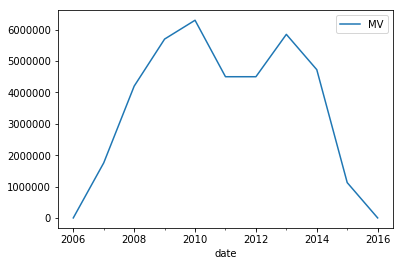

In [542]:
each_player.iloc[7:18].plot(x='date',y='MV')

<Figure size 432x288 with 0 Axes>

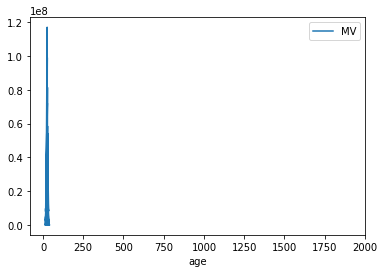

In [552]:
import matplotlib.pyplot as plt
plt.figure()
each_player.plot('age','MV')

In [216]:
players_MV.MV=players_MV['MV'].str.replace('-','-', regex=True)

In [7]:
#for i in range(5000,10000):#len(df['funded_quarter'])):
    #df['funded_month'].iloc[i]=df['funded_month'].iloc[i][5:]
    #df['funded_quarter'].iloc[i]=df['funded_quarter'].iloc[i][5:]
  

In [26]:
#converting type "object" to "datetime" for column "date" 
df['funded_at'] = df['funded_at'].astype('datetime64')
df.info()
#Sorting the values by 'date'
#df.sort_values(by='date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114505 entries, 0 to 114504
Data columns (total 25 columns):
company_permalink          114505 non-null object
company_name               114504 non-null object
company_category_list      111242 non-null object
company_market             111240 non-null object
company_country_code       107146 non-null object
company_state_code         79158 non-null object
company_region             107146 non-null object
company_city               105800 non-null object
investor_permalink         114439 non-null object
investor_name              114439 non-null object
investor_category_list     30507 non-null object
investor_market            30455 non-null object
investor_country_code      86521 non-null object
investor_state_code        62274 non-null object
investor_region            86521 non-null object
investor_city              86007 non-null object
funding_round_permalink    114505 non-null object
funding_round_type         114505 non-null obj

In [27]:
df["raised_amount_total_usd"].replace(['',' -   '], np.nan, inplace=True)

In [24]:
#df=df[df['funding_round_type']!= 'undisclosed']

In [56]:
df[df['investor_name']=='137 Ventures']

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_total_usd,raised_amount_each
44162,/organization/palantir-technologies,Palantir Technologies,|Analytics|,Analytics,USA,CA,SF Bay Area,Palo Alto,/organization/137-ventures,137 Ventures,...,San Francisco,/funding-round/9b6ea97f7014cc52dc0a5c2f9d1654b1,secondary_market,NaN,2011-01-01,2011-01,2011-Q1,2011,NaN,-
44230,/organization/solarcity,SolarCity,|Construction|Clean Technology|,Construction,USA,CA,SF Bay Area,San Mateo,/organization/137-ventures,137 Ventures,...,San Francisco,/funding-round/58100d6e6670124f53ec62a207b62409,secondary_market,NaN,2011-01-01,2011-01,2011-Q1,2011,NaN,-
44325,/organization/visto,Visto,|Mobile|,Mobile,USA,CA,SF Bay Area,Sunnyvale,/organization/137-ventures,137 Ventures,...,San Francisco,/funding-round/034768749e447bd217077c21b27cfb12,secondary_market,NaN,2011-01-01,2011-01,2011-Q1,2011,NaN,-
56876,/organization/50-cubes,50 Cubes,|Fashion|Social Games|Online Gaming|Women|,Women,USA,CA,SF Bay Area,San Francisco,/organization/137-ventures,137 Ventures,...,San Francisco,/funding-round/1cadd2472b35324e4e28b104d8e509b1,secondary_market,NaN,2012-01-01,2012-01,2012-Q1,2012,NaN,-
57101,/organization/eventbrite,Eventbrite,|Events|Curated Web|,Events,USA,CA,SF Bay Area,San Francisco,/organization/137-ventures,137 Ventures,...,San Francisco,/funding-round/0c2cd93429982bc6ce65e91d3848efa8,secondary_market,NaN,2012-01-01,2012-01,2012-Q1,2012,NaN,-
57148,/organization/glammedia,Mode Media,|Women|Fashion|Curated Web|,Fashion,USA,CA,SF Bay Area,Brisbane,/organization/137-ventures,137 Ventures,...,San Francisco,/funding-round/24a9447e37f7a5ac1fcb177b920b01a1,secondary_market,NaN,2012-01-01,2012-01,2012-Q1,2012,NaN,-
57414,/organization/practice-fusion,Practice Fusion,|Physicians|Electronic Health Records|Health C...,Health and Wellness,USA,CA,SF Bay Area,San Francisco,/organization/137-ventures,137 Ventures,...,San Francisco,/funding-round/873bee968cebf49a1885e22d00fe212e,secondary_market,NaN,2012-01-01,2012-01,2012-Q1,2012,NaN,-
57491,/organization/sharethis,ShareThis,|Advertising|File Sharing|Social Media|,Social Media,USA,CA,SF Bay Area,Palo Alto,/organization/137-ventures,137 Ventures,...,San Francisco,/funding-round/547140d92e2791643b92b3f4d20dc2c8,secondary_market,NaN,2012-01-01,2012-01,2012-Q1,2012,NaN,-
57525,/organization/specific-media,Specific Media,|Auctions|Digital Media|Advertising|,Advertising,USA,CA,Anaheim,Irvine,/organization/137-ventures,137 Ventures,...,San Francisco,/funding-round/2649ae4917aee301f6e55a20e971acd2,secondary_market,NaN,2012-01-01,2012-01,2012-Q1,2012,NaN,-
57530,/organization/spotify,Spotify,|Entertainment|Cloud Computing|Video Streaming...,Entertainment,SWE,NaN,Stockholm,Stockholm,/organization/137-ventures,137 Ventures,...,San Francisco,/funding-round/05e3129f24145ddac7f7115f115607c7,secondary_market,NaN,2012-01-01,2012-01,2012-Q1,2012,NaN,-


In [51]:
#for i in range(len(df["raised_amount_total_usd"])):
    #if df['investor_name'].iloc[i]=='10Xelerator':
        #df["raised_amount_total_usd"].iloc[i]=20000
        

In [16]:
df['funding_round_type'][df["raised_amount_total_usd"].isnull()]

0                   seed
7            undisclosed
8                venture
12           undisclosed
13           undisclosed
14           undisclosed
15           undisclosed
16           undisclosed
17           undisclosed
19           undisclosed
20               venture
21               venture
22           undisclosed
24           undisclosed
25           undisclosed
26           undisclosed
27           undisclosed
28           undisclosed
29           undisclosed
31           undisclosed
32           undisclosed
33           undisclosed
34           undisclosed
35           undisclosed
36           undisclosed
37           undisclosed
38           undisclosed
39           undisclosed
40           undisclosed
41           undisclosed
               ...      
114125       undisclosed
114161              seed
114180           venture
114181           venture
114189             angel
114190             angel
114191             angel
114192             angel
114193             angel


In [28]:
#df["raised_amount_total_usd"].str.split()
df["raised_amount_total_usd"].replace(',','',regex=True,inplace=True)
df["raised_amount_total_usd"]=pd.to_numeric(df["raised_amount_total_usd"],).astype(float)

In [ ]:
company_state_cod

In [34]:
#inv=df[df["raised_amount_total_usd"].isnull()].groupby(df['funding_round_type'])
USA=df[df['company_country_code']=='USA']
#inv=USA.groupby(df['company_state_code', 'funded_year'])["raised_amount_total_usd"]
USA.head()

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_total_usd,raised_amount_each
1,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01,1979-Q1,1979,1000000.000,#DIV/0!
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01,1979-Q1,1979,1000000.000,#DIV/0!
7,/organization/lenovo,Lenovo,|Hardware|,Hardware,USA,NC,Raleigh,Morrisville,/organization/chinese-academy-of-sciences,Chinese Academy Of Sciences,...,Beijing,/funding-round/0f444f3fdb0c1058aa70eeba9f0f5089,undisclosed,NaN,1984-01-01,1984-01,1984-Q1,1984,nan,-
12,/organization/aehr-test-systems,Aehr Test Systems,|Hardware + Software|,Hardware + Software,USA,CA,SF Bay Area,Fremont,/organization/summit-partners,Summit Partners,...,Boston,/funding-round/3b02cf325be61412c2af1eb545f4d568,undisclosed,NaN,1985-09-19,1985-09,1985-Q3,1985,nan,-
13,/organization/fsi-international,FSI International,|Semiconductors|,Semiconductors,USA,MN,Minneapolis,Chaska,/organization/summit-partners,Summit Partners,...,Boston,/funding-round/34b482e681b7e2ec7b0c7886e9f9d90d,undisclosed,NaN,1985-10-20,1985-10,1985-Q4,1985,nan,-


In [38]:
g8 = df[df.company_country_code.isin(['USA', 'GBR', 'FRA', 'GER', 'JPN', 'CAN', 'ITA'])]

In [43]:
g8

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_total_usd,raised_amount_each
0,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,NaN,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,...,NaN,/funding-round/14fe2864e02d0f15ddc3ec8eacdc8e1b,seed,NaN,1974-01-01,1974-01,1974-Q1,1974,nan,-
1,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01,1979-Q1,1979,1000000.000,#DIV/0!
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01,1979-Q1,1979,1000000.000,#DIV/0!
7,/organization/lenovo,Lenovo,|Hardware|,Hardware,USA,NC,Raleigh,Morrisville,/organization/chinese-academy-of-sciences,Chinese Academy Of Sciences,...,Beijing,/funding-round/0f444f3fdb0c1058aa70eeba9f0f5089,undisclosed,NaN,1984-01-01,1984-01,1984-Q1,1984,nan,-
12,/organization/aehr-test-systems,Aehr Test Systems,|Hardware + Software|,Hardware + Software,USA,CA,SF Bay Area,Fremont,/organization/summit-partners,Summit Partners,...,Boston,/funding-round/3b02cf325be61412c2af1eb545f4d568,undisclosed,NaN,1985-09-19,1985-09,1985-Q3,1985,nan,-
13,/organization/fsi-international,FSI International,|Semiconductors|,Semiconductors,USA,MN,Minneapolis,Chaska,/organization/summit-partners,Summit Partners,...,Boston,/funding-round/34b482e681b7e2ec7b0c7886e9f9d90d,undisclosed,NaN,1985-10-20,1985-10,1985-Q4,1985,nan,-
14,/organization/employee-benefit-plans,Employee Benefit Plans,NaN,NaN,USA,MN,Minneapolis,Minneapolis,/organization/summit-partners,Summit Partners,...,Boston,/funding-round/e54edf8a94111d1bdf7d1e0557701de7,undisclosed,NaN,1986-03-19,1986-03,1986-Q1,1986,nan,-
16,/organization/telebit,Telebit,NaN,NaN,USA,MA,Boston,Chelmsford,/organization/summit-partners,Summit Partners,...,Boston,/funding-round/3eedb6f3bf848731988dfa083acc4acc,undisclosed,NaN,1986-06-20,1986-06,1986-Q2,1986,nan,-
17,/organization/chips-and-technologies,Chips and Technologies,|Semiconductors|,Semiconductors,USA,CA,SF Bay Area,Milpitas,/organization/summit-partners,Summit Partners,...,Boston,/funding-round/a1ebcbd1921a3ef94baa3bc40c4e7905,undisclosed,NaN,1986-07-03,1986-07,1986-Q3,1986,nan,-
18,/organization/cisco,Cisco,|Software|Hardware|Networking|Web Hosting|,Software,USA,CA,SF Bay Area,San Jose,/organization/sequoia-capital,Sequoia Capital,...,Menlo Park,/funding-round/b9911ec2e19ad490dcdeb2d0d1a87c97,venture,A,1987-01-01,1987-01,1987-Q1,1987,2500000.000,#DIV/0!


In [47]:
g8plot=g8.groupby(['company_country_code','funded_year'])['raised_amount_total_usd'].sum()

In [50]:
unstack=g8plot.unstack('funded_year')
unstack=[:,25:]

SyntaxError: can't assign to function call (<ipython-input-50-fd8d7bf9629d>, line 1)

In [45]:
g8_countries=['USA', 'GBR', 'FRA', 'GER', 'JPN', 'CAN', 'ITA']

In [46]:
for i in g8_countries:
    historical_trend=pd.DataFrame(g8.groupby([i,'funded_year']).agg({'raised_amount_total_usd':'sum'}))
    historical_trend.plot()
    plt.ylabel("Amount of Investments in G8 countries"+str(i))

KeyError: 'USA'

In [37]:
USA.groupby(['company_state_code','funded_year'])['raised_amount_total_usd'].sum()

company_state_code  funded_year
AK                  2007              8700000.000
                    2014               150000.000
AL                  2006             14000000.000
                    2007             12925000.000
                    2008              7750000.000
                    2009             12000000.000
                    2010                    0.000
                    2011              1800000.000
                    2012             29400000.000
                    2013             21410000.000
                    2014             14299999.000
AR                  2006             15050000.000
                    2008            495000000.000
                    2009               500000.000
                    2010             15010000.000
                    2012             25058333.000
                    2013            102039999.000
                    2014             56642355.000
AZ                  1990                    0.000
                  

Text(0, 0.5, 'Amount of Investments')

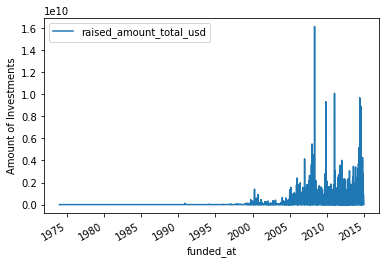

In [17]:

daily_trend=pd.DataFrame(df.groupby(['funded_at']).agg({'raised_amount_total_usd':'sum'}))
daily_trend.plot()
plt.ylabel("Amount of Investments")

In [63]:
df["raised_amount_total_usd"][7242]

nan